<a href="https://colab.research.google.com/github/alejoriosm04/supermarket-sales-data-analysis/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Leemos los datos del archivo .csv y los almacenamos en un Dataframe de Pandas. Analizamos el contenido

In [26]:
supermarket_sales = pd.read_csv('./dataset.csv', sep=",")
supermarket_sales.sample(5)

,InvoiceID,Branch,City,CustomerType,Gender,ProductLine,UnitPrice,Quantity,Tax5Percentage,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
569,408-26-9866,Exito Laureles,Medellin,Normal,Female,Sports and travel,73.98,7,25.8930,543.753,3/2/2019,16:42,Ewallet,517.86,4.761905,25.8930,4.1
950,503-21-4385,Exito Wow Poblado,Medellin,Member,Male,Health and beauty,39.91,3,5.9865,NaN,2/21/2019,12:40,Ewallet,119.73,4.761905,5.9865,9.3
86,362-58-8315,Exito Laureles,Medellin,Normal,Male,Fashion accessories,76.52,5,19.1300,NaN,3/25/2019,10:23,Cash,382.60,4.761905,19.1300,9.9
719,821-14-9046,Exito Wow Poblado,Medellin,Member,Female,Fashion accessories,17.48,6,5.2440,110.124,1/18/2019,15:04,Credit card,104.88,4.761905,5.2440,6.1
257,729-09-9681,Exito San Antonio,Medellin,Member,Male,Home and lifestyle,25.91,6,7.7730,163.233,2/5/2019,10:16,Ewallet,155.46,4.761905,7.7730,8.7


Al analizar el estado vemos que hay valores nulos y algunas columnas innecesarias para las preguntas a responder.

Los valores nulos en la columna Total, los completamos calculando el respectivo total con los demás datos de las otras columnas que se nos dan.

In [27]:
supermarket_sales.Total.fillna(supermarket_sales.UnitPrice*supermarket_sales.Quantity+supermarket_sales.Tax5Percentage, inplace=True)
supermarket_sales.sample(5)

,InvoiceID,Branch,City,CustomerType,Gender,ProductLine,UnitPrice,Quantity,Tax5Percentage,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
996,303-96-2227,Exito Wow Poblado,Medellin,Normal,Female,Home and lifestyle,97.38,10,48.690,1022.490,3/2/2019,17:16,Ewallet,973.80,4.761905,48.690,4.4
898,725-54-0677,Exito Laureles,Medellin,Member,Male,Health and beauty,85.60,7,29.960,629.160,3/2/2019,13:50,Cash,599.20,4.761905,29.960,5.3
422,271-88-8734,Exito Laureles,Medellin,Member,Female,Fashion accessories,97.21,10,48.605,1020.705,2/8/2019,13:00,Credit card,972.10,4.761905,48.605,8.7
365,834-25-9262,Exito Laureles,Medellin,Normal,Female,Fashion accessories,81.68,4,16.336,343.056,1/6/2019,12:12,Cash,326.72,4.761905,16.336,9.1
75,732-94-0499,Exito Laureles,Medellin,Normal,Female,Electronic accessories,41.65,10,20.825,437.325,1/13/2019,17:04,Credit card,416.50,4.761905,20.825,5.4


Eliminamos columnas innecesarias. En este caso no necesitamos la columna ciudad porque es un dato redundante.



In [28]:
supermarket_sales = supermarket_sales.drop(["City"], axis=1)
supermarket_sales.sample(5)

,InvoiceID,Branch,CustomerType,Gender,ProductLine,UnitPrice,Quantity,Tax5Percentage,Total,Date,Time,Payment,cogs,grossmarginpercentage,grossincome,Rating
161,275-28-0149,Exito San Antonio,Normal,Male,Sports and travel,63.69,1,3.1845,66.8745,2/25/2019,16:21,Cash,63.69,4.761905,3.1845,6.0
421,740-22-2500,Exito Laureles,Normal,Female,Electronic accessories,84.05,3,12.6075,264.7575,1/23/2019,13:29,Cash,252.15,4.761905,12.6075,9.8
734,238-45-6950,Exito Wow Poblado,Member,Male,Food and beverages,53.72,1,2.6860,56.4060,3/1/2019,20:03,Ewallet,53.72,4.761905,2.6860,6.4
342,873-95-4984,Exito Wow Poblado,Member,Female,Health and beauty,76.90,7,26.9150,565.2150,2/15/2019,20:21,Cash,538.30,4.761905,26.9150,7.7
184,586-25-0848,Exito San Antonio,Normal,Female,Sports and travel,12.34,7,4.3190,90.6990,3/4/2019,11:19,Credit card,86.38,4.761905,4.3190,6.7


**La cadena de supermercados está
pasando por una mala situación
económica y necesita decidir cuál
de sus ramas cerrar, ¿cuál
recomendaría usted cerrar?**

Comenzamos el análisis de datos. Vamos a mirar primero, ¿qué cantidad de clientes miembros y de clientes normales tiene cada Exito del Dataset.

Graficamos la cantidad total de clientes de cada sucursal.

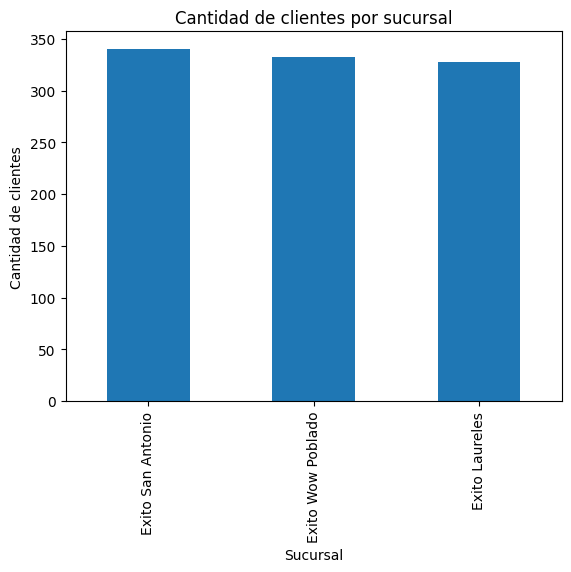

In [74]:
branch_total_customers = supermarket_sales['Branch'].value_counts()
branch_total_customers.plot.bar()
plt.title('Cantidad de clientes por sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Cantidad de clientes')
plt.show()

- Vemos que hay una menor cantidad de clientes en el Exito Laureles.

Graficamos la cantidad de clientes por cada tipo (Miembro o Normal) por cada sucursal.

In [29]:
# Verificamos cuales son las sucursales presentes en el Dataset
print(supermarket_sales['Branch'].unique())

branch_customer_type = supermarket_sales.groupby('Branch')['CustomerType'].value_counts().unstack()
branch_customer_type.sample(3)

['Exito San Antonio' 'Exito Laureles' 'Exito Wow Poblado']
CustomerType       Member  Normal
Branch                           
Exito Laureles        169     159
Exito San Antonio     167     173
Exito Wow Poblado     165     167


CustomerType,Member,Normal
Branch,,
Exito San Antonio,167,173
Exito Laureles,169,159
Exito Wow Poblado,165,167


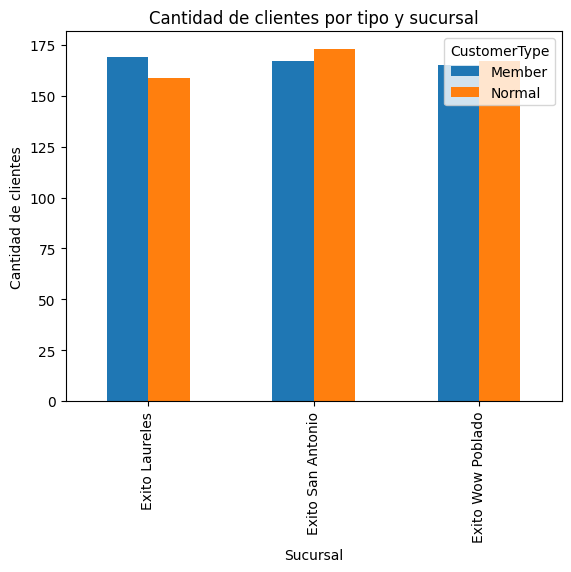

In [ ]:
branch_customer_type.plot.bar()
plt.title('Cantidad de clientes por tipo y sucursal')
plt.xlabel('Sucursal')
plt.ylabel('Cantidad de clientes')
plt.show()

- Exito Laureles es la tienda con mayor cantidad de miembros. Seguido del Exito San Antonio y el Exito Wow Poblado es la de menor cantidad de miembros.
- Exito San Antonio tiene la mayor cantidad de clientes normales, le sigue Exito Wow Poblado y el Exito Laureles es la de menor cantidad de clientes normales.

Analicemos como son los **ingresos totales** de cada sucursal del Exito.
Haremos un gráfico de ingreso total en general y de ingresos totales de compras realizadas por miembros.

Tendremos un Dataframe para cada agrupación de los datos.

In [33]:
total_sales = supermarket_sales.groupby('Branch')['Total'].sum()
total_sales.sample(3)

Branch
Exito Laureles       110568.7065
Exito San Antonio    106200.3705
Exito Wow Poblado    106197.6720
Name: Total, dtype: float64

In [32]:
total_sales_members = supermarket_sales[supermarket_sales['CustomerType'] == 'Member'].groupby('Branch')['Total'].sum()
total_sales_members.sample(3)

Branch
Exito Laureles       56881.2825
Exito Wow Poblado    53704.6860
Exito San Antonio    53637.4755
Name: Total, dtype: float64

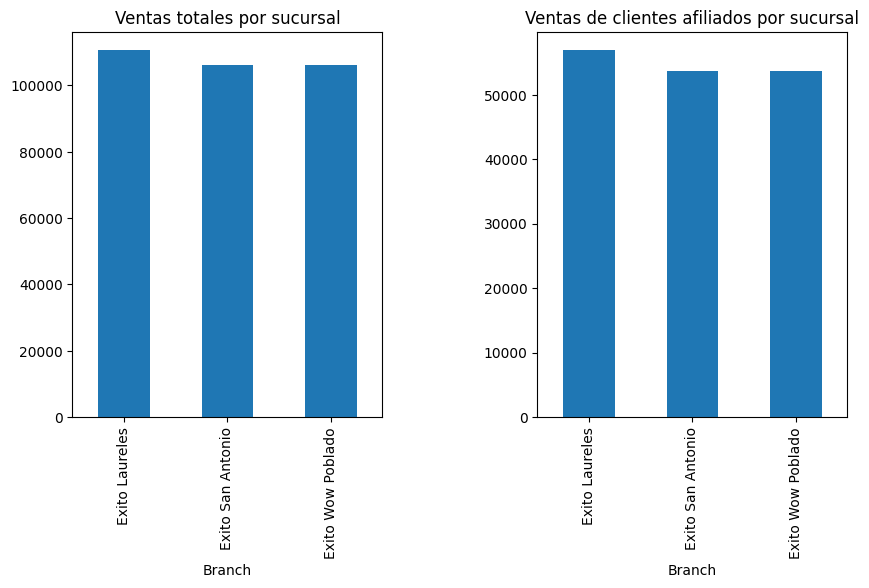

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

total_sales.plot(kind='bar', ax=axs[0])
axs[0].set_title('Ventas totales por sucursal')

total_sales_members.plot(kind='bar', ax=axs[1])
axs[1].set_title('Ventas de clientes afiliados por sucursal')

fig.subplots_adjust(wspace=0.5)
plt.show()

- En ambas gráficas, Exito Laureles es la tienda de mayor ingresos totales en ventas.
- Del mismo modo, en ambas el Exito San Antonio es la de menor cantidad total de ingresos en ventas. Los clientes normales no son tan fieles.

Analicemos como es la experiencia y la calificación que los clientes le dan a cada sucursal. Del mismo modo, analicemos que opinan los miembros.

In [35]:
mean_rating_by_branch = supermarket_sales.groupby('Branch')['Rating'].mean()
mean_rating_by_branch.sample(3)

Branch
Exito San Antonio    7.027059
Exito Laureles       7.072866
Exito Wow Poblado    6.818072
Name: Rating, dtype: float64

In [38]:
mean_rating_by_branch_members = supermarket_sales[supermarket_sales['CustomerType'] == 'Member'].groupby('Branch')['Rating'].mean()
mean_rating_by_branch_members.sample(3)

Branch
Exito Wow Poblado    6.770303
Exito San Antonio    6.998802
Exito Laureles       7.048521
Name: Rating, dtype: float64

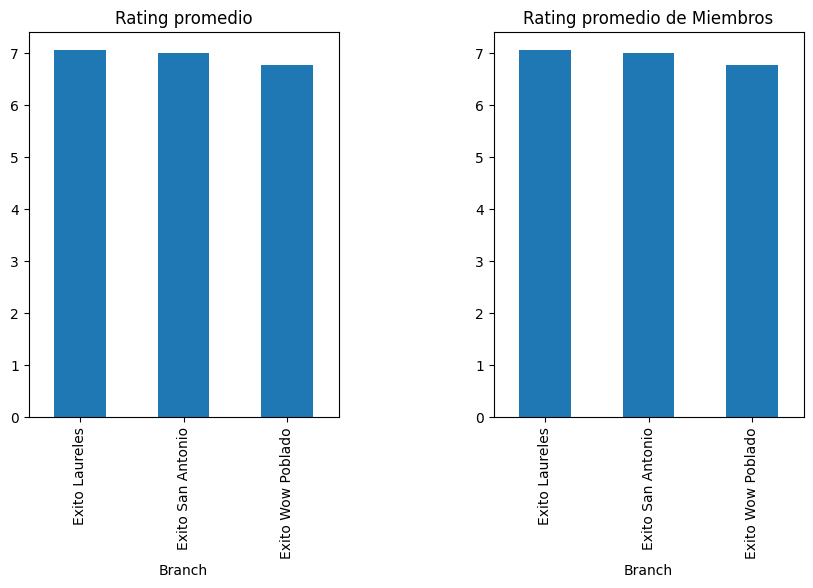

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

mean_rating_by_branch.plot(kind='bar', ax=axs[0])
axs[0].set_title('Rating promedio')

mean_rating_by_branch_members.plot(kind='bar', ax=axs[1])
axs[1].set_title('Rating promedio de Miembros')

fig.subplots_adjust(wspace=0.5)
plt.show()

- En general, los clientes tuvieron una mejor percepción y experiencia en el Exito Laureles. Al igual que los clientes que son miembros.
- En el Exito Wow Poblado la experiencia no es tan buena por parte de los clientes en general y de los miembros.
- El Exito San Antonio tiene una experiencia muy similar al Exito Laureles por parte de los clientes.

Analicemos los ingresos brutos de cada sucursal. Es decir, la diferencia entre las ventas y el costo de los bienes vendidos, lo que indica la cantidad total de ingresos que ha generado la empresa.

In [19]:
gross_income_total = supermarket_sales.groupby('Branch')['grossincome'].sum()
print(gross_income_total)

Branch
Exito Laureles       5265.1765
Exito San Antonio    5057.1605
Exito Wow Poblado    5057.0320
Name: grossincome, dtype: float64


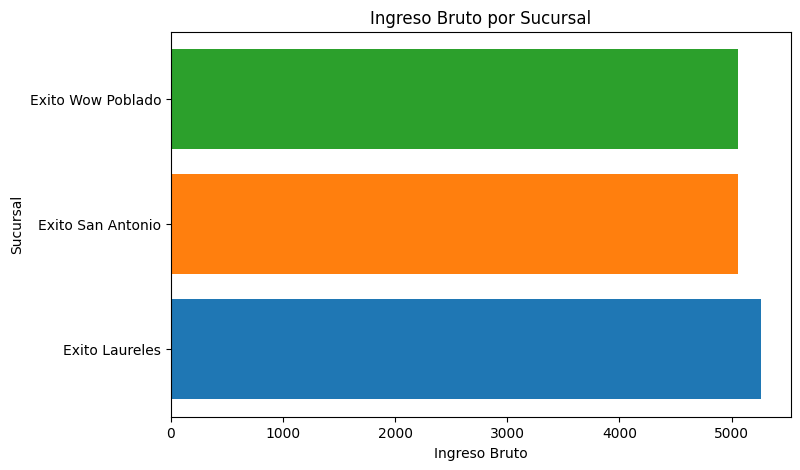

In [20]:
colores = ['#1f77b4', '#ff7f0e', '#2ca02c']

fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(gross_income_total.index, gross_income_total.values, color=colores)

ax.set_xlabel('Ingreso Bruto en Dolares')
ax.set_ylabel('Sucursal')
ax.set_title('Ingreso Bruto por Sucursal')

plt.show()

- Exito Laureles es la tienda con mayor ingreso bruto. Por lo tanto, es la tienda que más ganacias esta generando.
- Exito San Antonio y Exito Wow Poblado tienen prácticamente la misma cantidad de ganancias.

El impacto que tuvieron la cantidad de productos vendidos por cada tienda.

In [65]:
total_quantity_sales = supermarket_sales.groupby('Branch')['Quantity'].sum()
total_quantity_sales.sample(3)

Branch
Exito Wow Poblado    1820
Exito Laureles       1831
Exito San Antonio    1859
Name: Quantity, dtype: int64

In [42]:
total_quantity_sales_members = supermarket_sales[supermarket_sales['CustomerType'] == 'Member'].groupby('Branch')['Quantity'].sum()
total_quantity_sales_members.sample(3)

Branch
Exito San Antonio    964
Exito Laureles       897
Exito Wow Poblado    924
Name: Quantity, dtype: int64

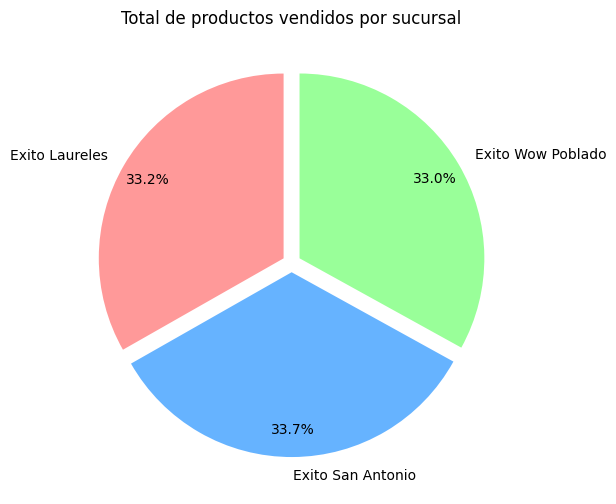

In [67]:
fig, ax = plt.subplots()

fig.set_size_inches(6, 6)
labels = total_quantity_sales.index.tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05, 0.05, 0.05)

ax.pie(total_quantity_sales.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
ax.set_title('Total de productos vendidos por sucursal')

plt.show()

- En el Exito San Antonio fue donde se vendió la mayor cantidad de productos.
- El Exito Wow Poblado tuvo la menor cantidad de productos vendidos, sin embargo, estuvo muy cercano a la cantidad de productos vendidos en Exito Laureles.

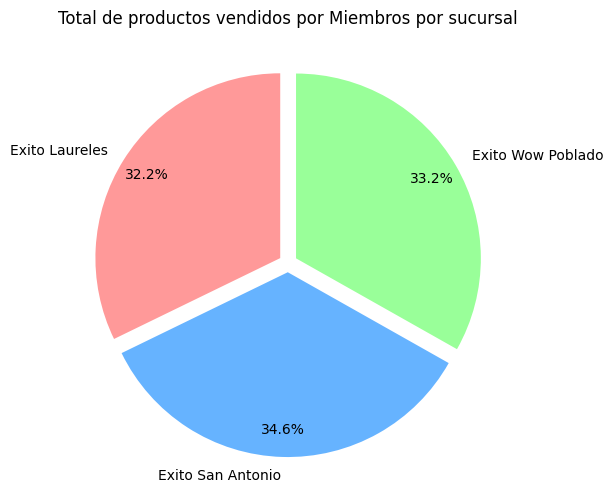

In [68]:
fig, ax = plt.subplots()

fig.set_size_inches(6, 6)
labels = total_quantity_sales_members.index.tolist()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
explode = (0.05, 0.05, 0.05)

ax.pie(total_quantity_sales_members.values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
ax.set_title('Total de productos vendidos por Miembros por sucursal')

plt.show()

- Fue mayor la cantidad de productos vendidos en el Exito San Antonio por parte de clientes Miembros.
- El Exito Laureles disminuyó en la cantidad de productos vendidos por parte de clientes Miembros.

**La cadena de supermercados
quiere implementar una
estrategia cashless, es decir, que
no se reciban pagos en efectivo.
¿Cree usted que es viable y
traería un beneficio?**

Analicemos como es la distribución de los métodos de pago por cada tipo de cliente y en general.

Unimos en una sola columna los 2 métodos de pago eléctronicos exitentes.

In [82]:
supermarket_sales['Payment'] = supermarket_sales['Payment'].replace(['Credit card', 'Ewallet'], 'Electronic Payment')

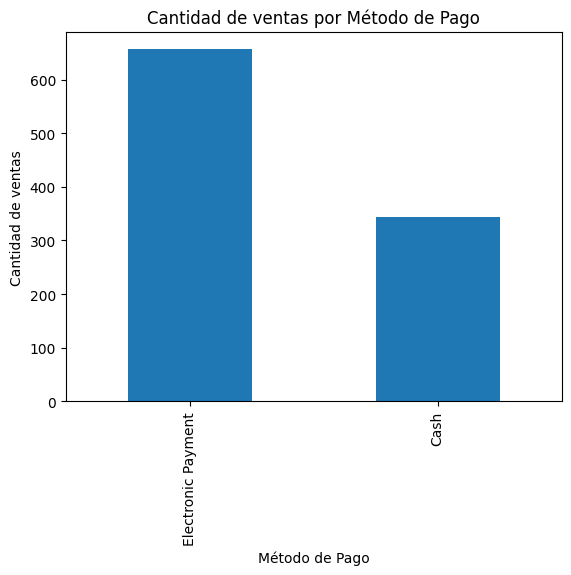

In [83]:
payment_total = supermarket_sales['Payment'].value_counts()
payment_total.plot.bar()
plt.title('Cantidad de ventas por Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de ventas')
plt.show()

- Claramente, en general, los clientes prefieren hacer uso de métodos eléctricos para el pago de las compras.

In [84]:
print(supermarket_sales['Payment'].unique())

payment_customer_type = supermarket_sales.groupby('Payment')['CustomerType'].value_counts().unstack()
payment_customer_type.sample(2)

['Electronic Payment' 'Cash']


CustomerType,Member,Normal
Payment,,
Cash,168,176
Electronic Payment,333,323


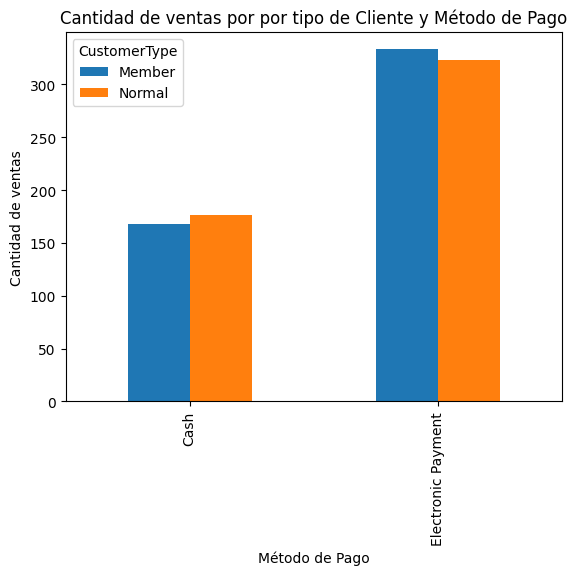

In [86]:
payment_customer_type.plot.bar()
plt.title('Cantidad de ventas por tipo de Cliente y Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de ventas')
plt.show()

- Notoriamente, los clientes que son Miembros, prefieren los étodos eléctronicos de pago. Incluso, son menos los Miembros que pagan en efectivo que los clientes normales.

Miremos cuánto dinero movió cada método de pago.

In [87]:
payment_total_incomes = supermarket_sales.groupby('Payment')['Total'].sum()
payment_total_incomes.sample(2)

Payment
Electronic Payment    210760.179
Cash                  112206.570
Name: Total, dtype: float64

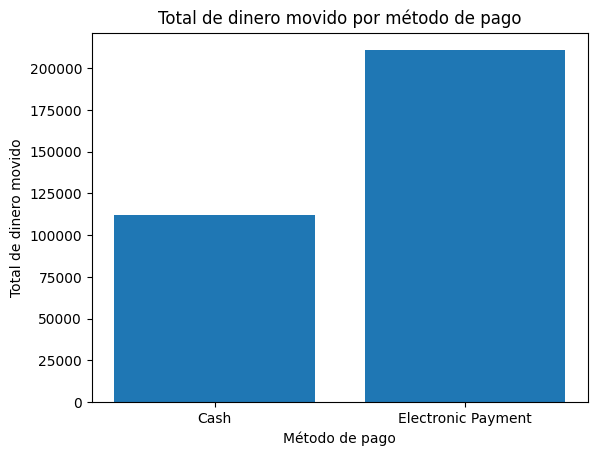

In [89]:
plt.bar(payment_total_incomes.index, payment_total_incomes.values)

plt.title('Total de dinero movido por método de pago')
plt.xlabel('Método de pago')
plt.ylabel('Total de dinero movido')

plt.show()

- Los métodos eléctronicos movieron casi el doble de lo que los métodos en efectivo movieron en ventas.

Finalmente, miremos el método de pago preferido de cada tienda Exito.

In [90]:
payment_branch = supermarket_sales.groupby('Payment')['Branch'].value_counts().unstack()
payment_branch.sample(2)

Branch,Exito Laureles,Exito San Antonio,Exito Wow Poblado
Payment,,,
Cash,124,110,110
Electronic Payment,204,230,222


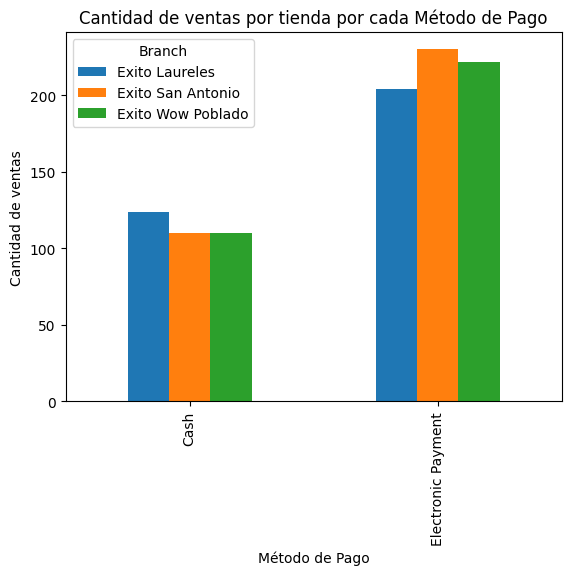

In [92]:
payment_branch.plot.bar()
plt.title('Cantidad de ventas por tienda por cada Método de Pago')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de ventas')
plt.show()

- Exito Laureles es la tienda de mayor ventas en efectivo y la de menor cantidad de ventas en métodos eléctronicos.
- Exito San Antonio es la tienda de mayor ventas en métodos eléctronicos.